# 3.5. Задача регрессии с помощью нейронной сети.

In [9]:
import torch
import matplotlib.pyplot as plt

In [10]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

## Train dataset

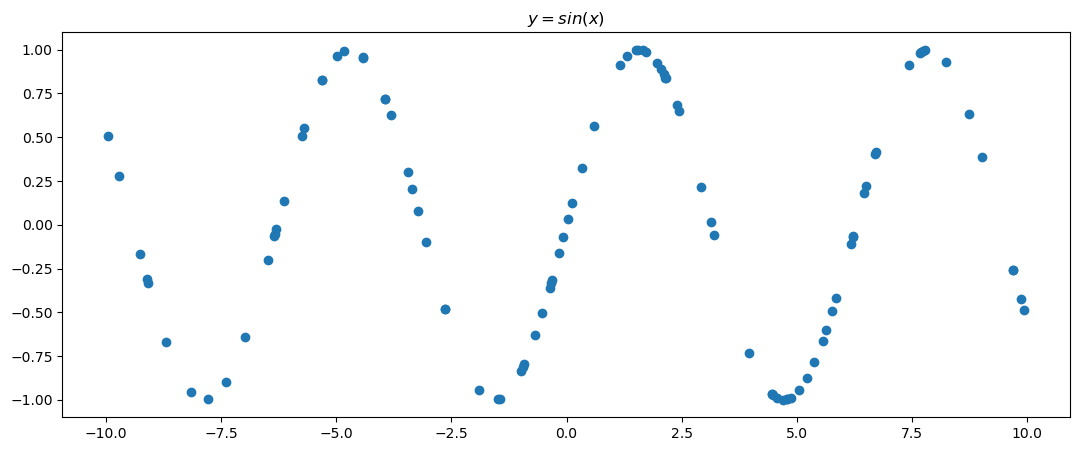

In [11]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

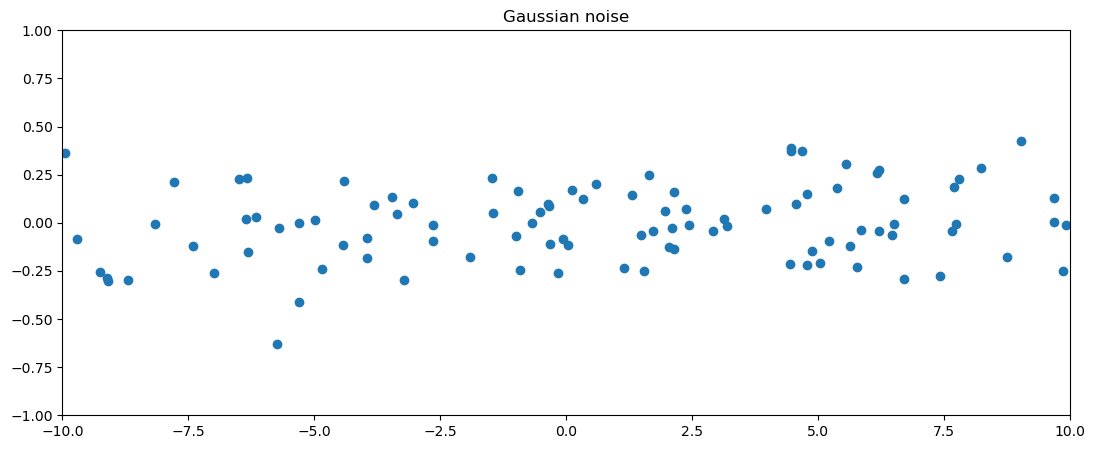

In [12]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

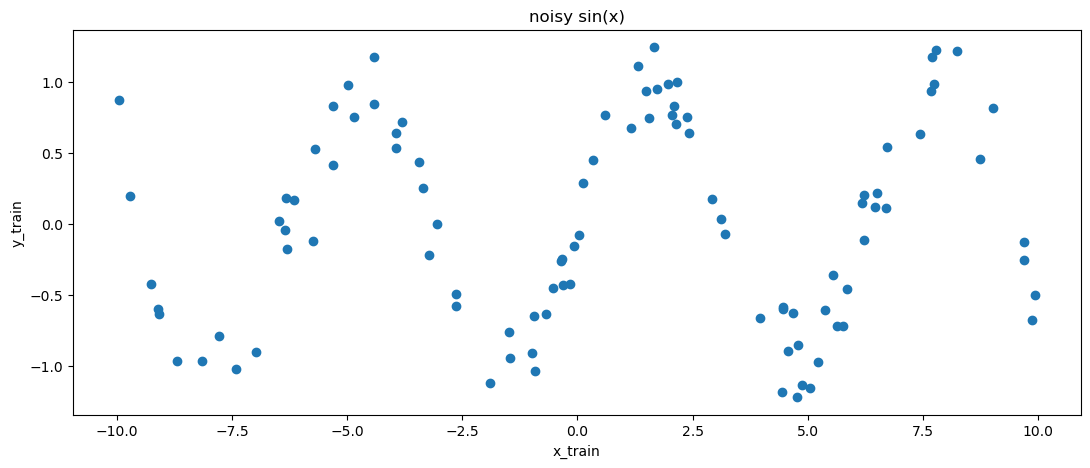

In [13]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

Когда мы будем передавать в нейросеть данные, нам хочется, чтобы они были правильной размерности. Ведь, по сути, признаком объекта может быть не одно число, как здесь (координата "X", по которой мы хотим предсказать координату "Y"), а может быть сразу несколько чисел. Соответственно, для общности, нам нужно наш вектор X (который сейчас строчка), превратить в столбец, у которого в каждой строчке будет одно число X. Это делает метод unsqueeze(). Если вы в PyTorch видите нижнее подчёркивание в названии метода, это значит, что этот метод трансформирует тот объект к которому он применяется, то есть после выполнения этой ячейки у нас X_train и Y_train изменились, и теперь это столбцы.

In [14]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [15]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


## Validation dataset

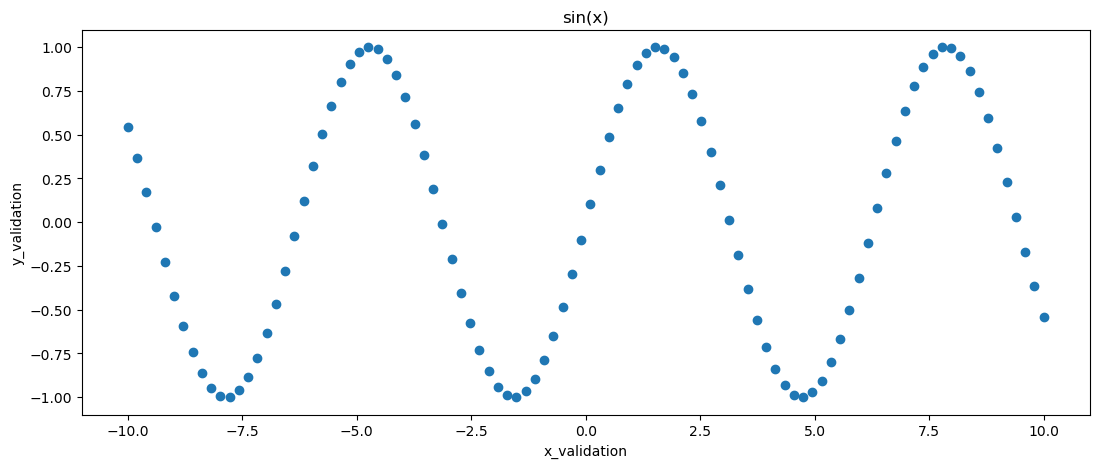

In [16]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [17]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

**Промежуточное задание.**

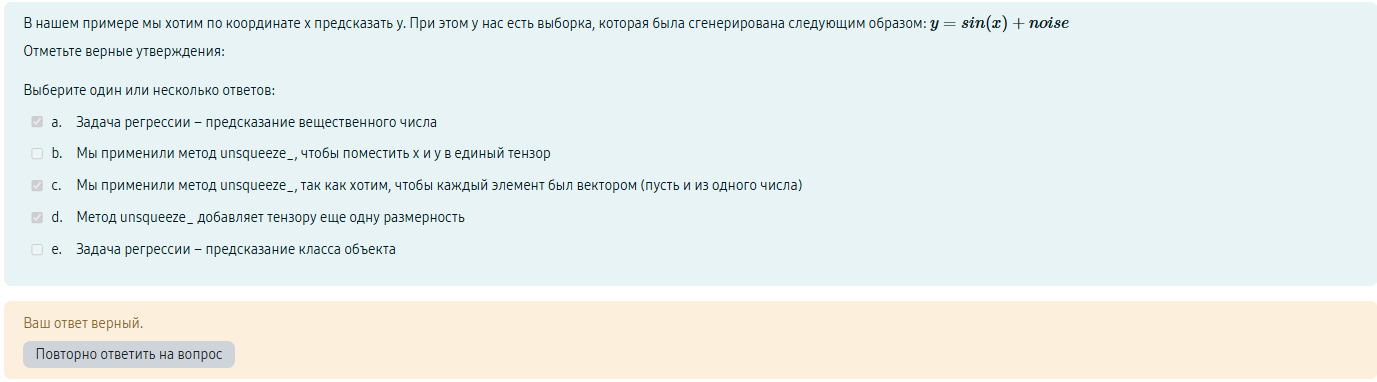

## Model construction

In [36]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(20)

**Промежуточное задание.**

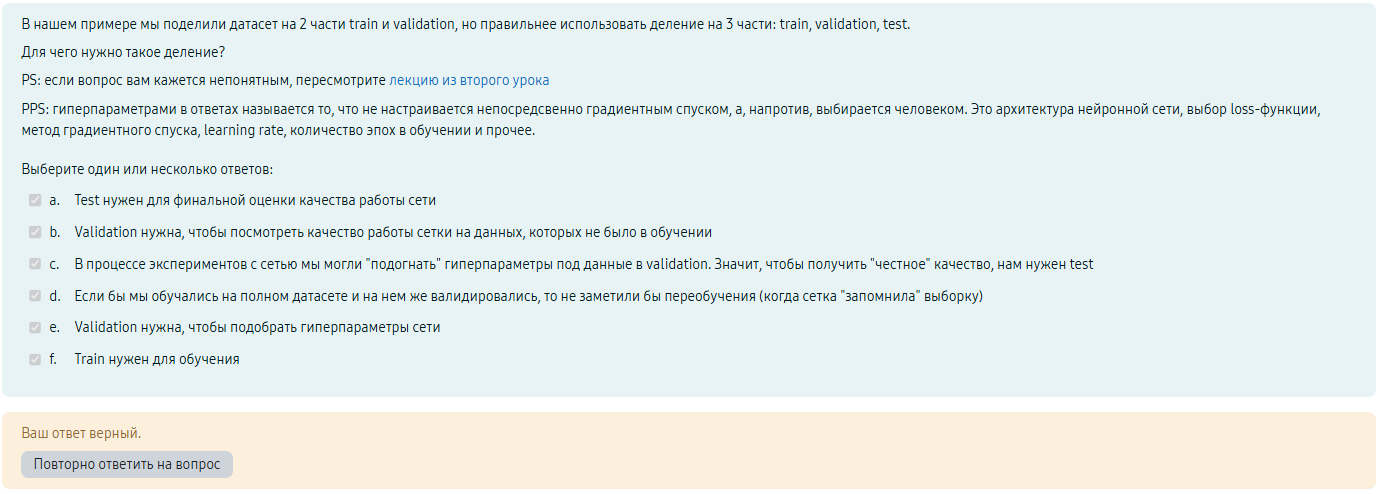

## Prediction

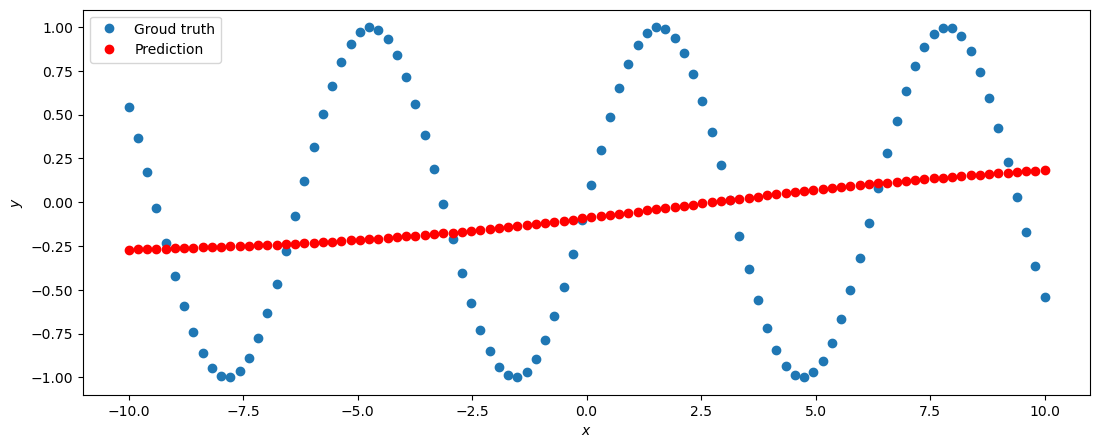

In [19]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

**Промежуточное задание.**

Давайте попрактикуемся с SineNet:

1) Добавим еще один fc-слой

2) Заменим активацию между слоями на гиперболический тангенс

In [31]:
class SineNetUpdate(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNetUpdate, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
    
sine_net = SineNetUpdate(int(input()))
sine_net.forward(torch.Tensor([1.]))
    
print(sine_net)

SineNetUpdate(
  (fc1): Linear(in_features=1, out_features=2, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=2, out_features=1, bias=True)
)


## Optimizer

In [37]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

## Loss function

In [38]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

## Training procedure

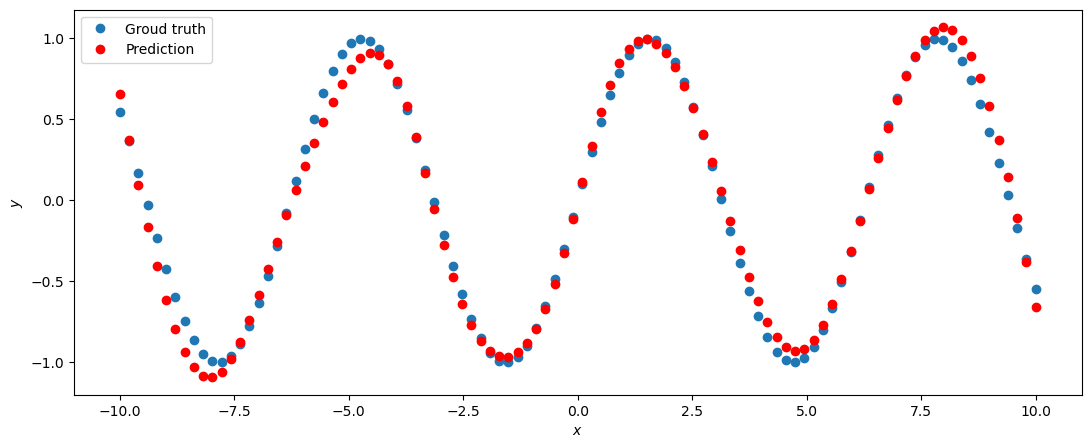

In [39]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

**Итоговое задание.**





Обучим нейронную сеть для задачи регрессии:

Возьмем более сложную функцию в качестве таргета: $ y = 2^x sin(2^{−x}) $

Кроме того, мы хотим получить хорошую метрику MAE на валидации: $ MAE = \sum_{i=1}^l|y(pred)_i−y(target)_i| \ $

MSE выглядит как $ MSE = \sum_{i=1}^l(y(pred)_i−y(target)_i)^2 \ $

Вот пример того, как нейросеть может отрабатывать на данной функции:

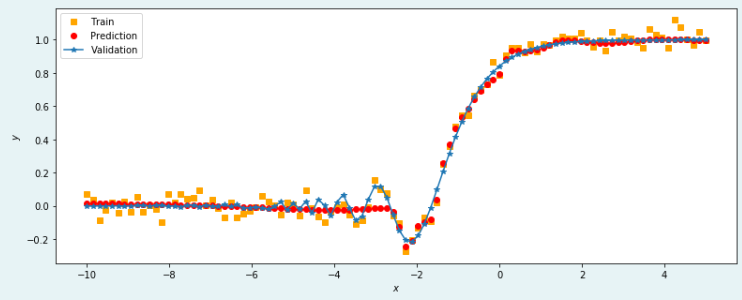

Данный пример показывает MAE на валидации ~0.021 . Получите метрику не хуже 0.03

Что можно варьировать: 

1) Архитектуру сети

2) loss-функцию

3) lr оптимизатора

4) Количество эпох в обучении

Удачи!

In [40]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.2003e-04],
        [ 2.6802e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9868e-03],
        [-4.1531e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4946e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5003e-03],
        [-1.1817e-02],
        [-2.0529e-02],
        [-2.9806e-03],
        [ 2.4776e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9170e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3338e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

In [58]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

net = RegressionNet(10)

In [59]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [60]:
def loss(pred, target):
    return (pred - target).abs().mean()

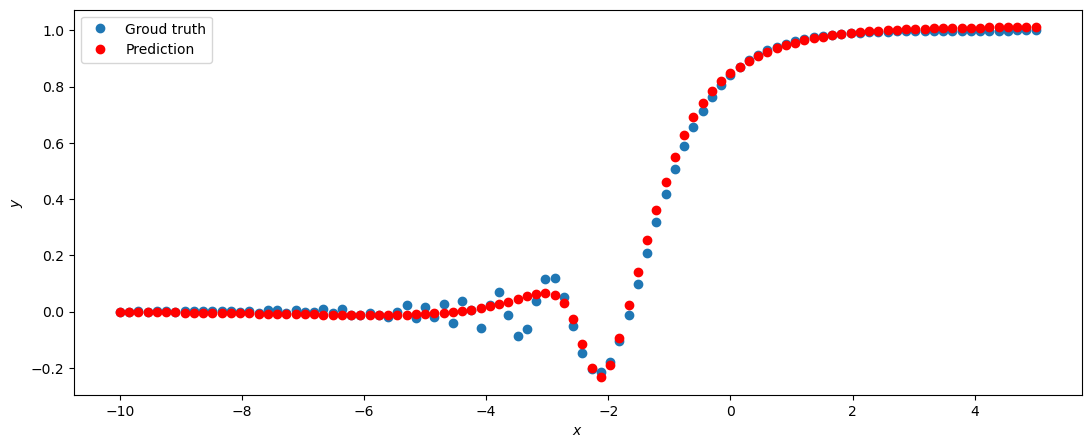

In [61]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    
    loss_value.backward()
    optimizer.step()

predict(net, x_validation, y_validation)

In [63]:
# Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

0.0167667455971241
